In [1]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
har_df = pd.read_csv('C:\\Users\\MHD\\Desktop\\Research\\Semester 2\\thesis\\thesis proposal\\related work expirement\\Real world WISDM_at_latest\\home\\share\\data\\public_sets\\WISDM_at_v2.0\\WISDM_at_v2.0_raw.txt', header = None, names = columns,error_bad_lines=False)


#C:\\Users\\MHD\\Desktop\\Research\\Semester 2\\thesis\\thesis proposal\\related work expirement\\Actitivty Prediction Dataset , WISDM_ar_v1.1\\WISDM_ar_v1.1_raw.txt
#C:\\Users\\MHD\\Desktop\\Research\\Semester 2\\thesis\\thesis proposal\\related work expirement\\Real world WISDM_at_latest\\home\\share\\data\\public_sets\\WISDM_at_v2.0\\WISDM_at_v2.0_raw.txt
# removing null values
har_df = har_df.dropna()
har_df.shape

# transforming the z-axis to float
har_df['z-axis'] = har_df['z-axis'].str.replace(';', '')
har_df['z-axis'] = har_df['z-axis'].apply(lambda x:float(x))

# drop the rows where timestamp is 0
df = har_df[har_df['timestamp'] != 0]

# now arrange data in ascending order of the user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [2]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,194,Standing,1370367549273,-0.382459,10.473502,-1.676937
1,194,Standing,1370367549324,-0.382459,10.473502,-1.725970
2,194,Standing,1370367549374,-0.382459,10.473502,-1.765197
3,194,Standing,1370367549479,-0.382459,10.473502,-1.804424
4,194,Standing,1370367549529,-0.382459,10.522535,-1.804424


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980765 entries, 0 to 2980764
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  object 
 3   x-axis     float64
 4   y-axis     float64
 5   z-axis     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 136.4+ MB


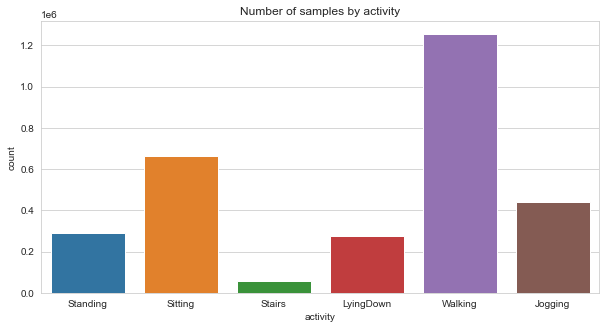

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

In [7]:
# plt.figure(figsize = (18, 6))
# sns.countplot(x = 'user', hue = 'activity', data = df)
# plt.title('Activities by Users')
# plt.show()

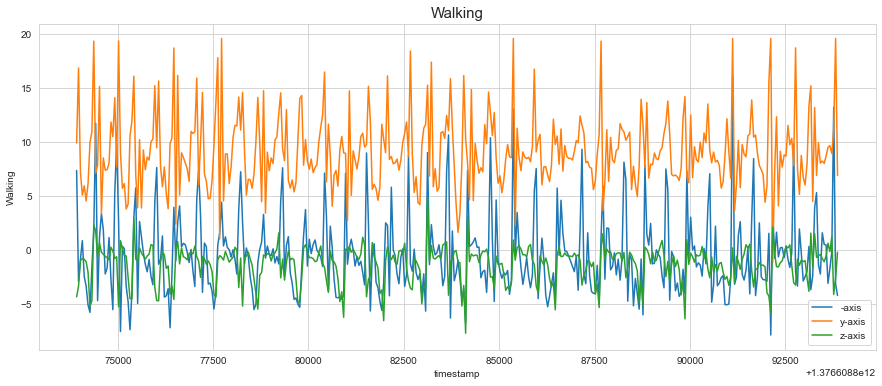

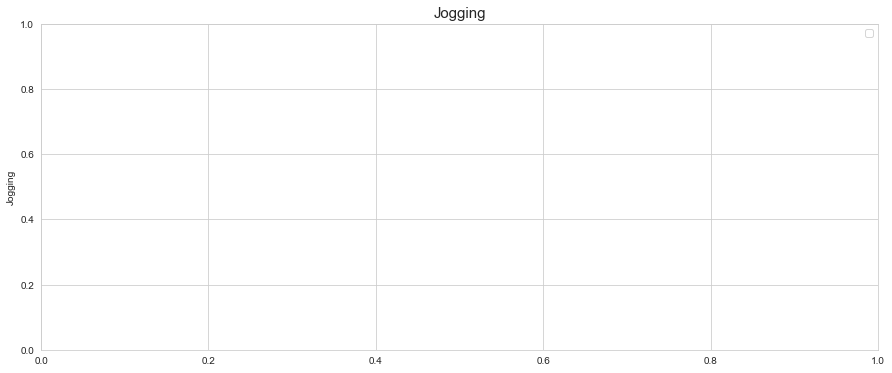

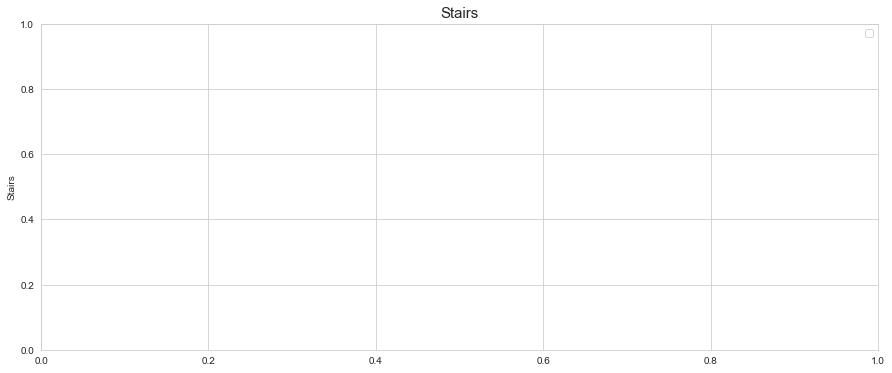

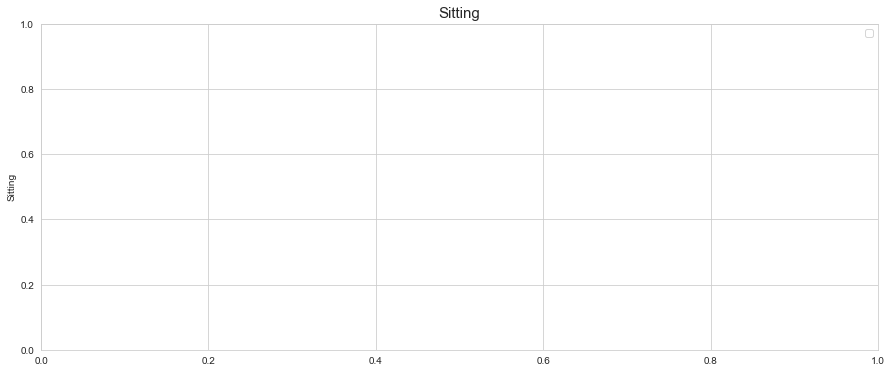

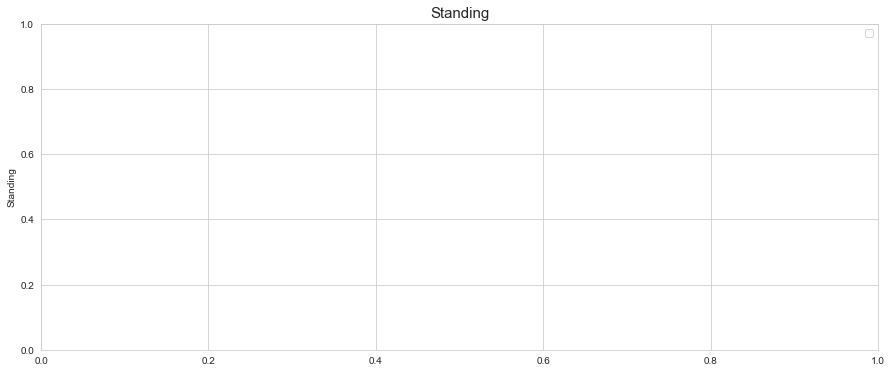

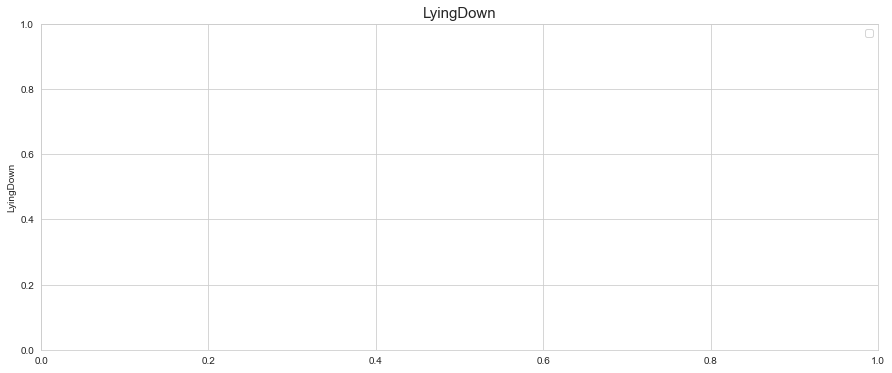

In [14]:
for i in ['Walking', 'Jogging','Stairs', 'Sitting', 'Standing','LyingDown',]:
  data_36 = df[(df['user'] == 1768) & (df['activity'] == i)][:400]
  plt.figure(figsize = (15, 6))
  sns.lineplot(y = 'x-axis', x = 'timestamp', data = data_36)
  sns.lineplot(y = 'y-axis', x = 'timestamp', data = data_36)
  sns.lineplot(y = 'z-axis', x = 'timestamp', data = data_36)
  plt.legend(['-axis', 'y-axis', 'z-axis'])
  plt.ylabel(i)
  plt.title(i, fontsize = 15)
  plt.show()

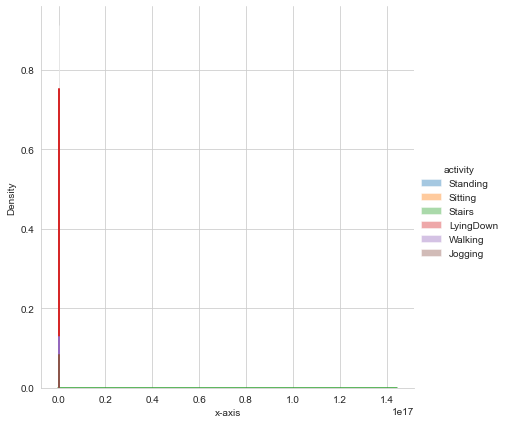

In [26]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'x-axis').add_legend()

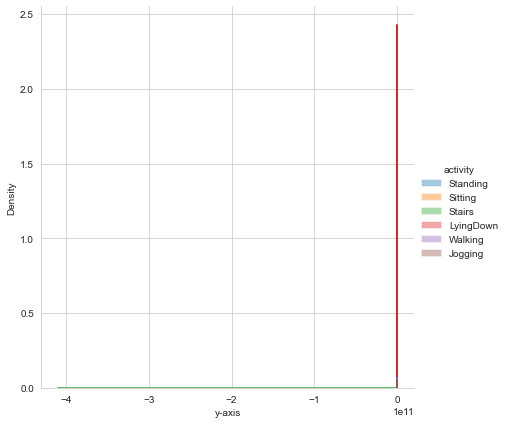

In [12]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'y-axis').add_legend()

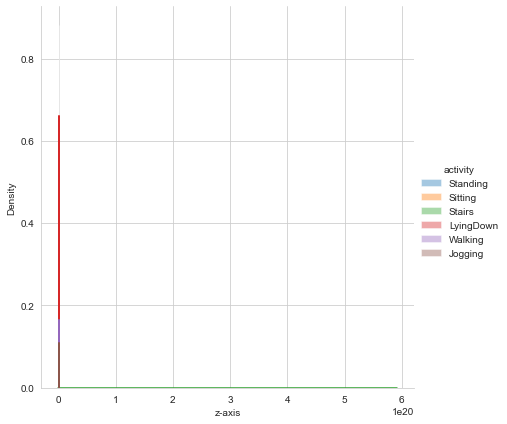

In [13]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'z-axis').add_legend()